In [20]:
import root_pandas as rp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lets look at the real data 

In [32]:
#Import real data
data=rp.read_root('RootFiles/DataSamples.root')
data['BDTval']=rp.read_root('RootFiles/TMVAppValuesData.root')

In [87]:
signaldata=data[data['BDTval']>-0.5]

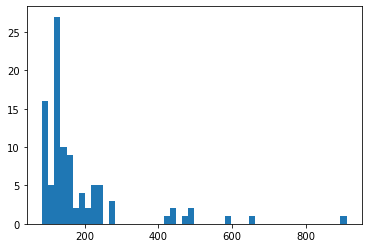

In [172]:
plt.hist(signaldata['FourLepSystemM'],bins=50)
plt.show()

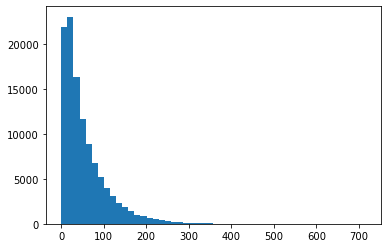

In [37]:
plt.hist(signal['FourLepSystempt'],bins=50)
plt.show()

Now, we split simulated data to see the behavior of signal and background

In [34]:
sigmc=rp.read_root('RootFiles/DataTest.root', 'Signal')
sigmc['BDTval']=rp.read_root('RootFiles/TMVAppValues.root')
bckmc=rp.read_root('RootFiles/DataTest.root', 'Background')
bckmc['BDTval']=rp.read_root('RootFiles/TMVAppValues.root')
datanocut=rp.read_root('RootFiles/DataSamplesNoCuts.root')

In [24]:
signalmc=sigmc['BDTval']         
bckgmc=bckmc['BDTval']

In [8]:
sgsize=signalmc.size
bckgsize=bckgmc.size

In [41]:
space=30
cuts=np.linspace(-0.8,0.6,space)
efficiency=np.zeros(space)
significance=np.zeros(space)
bckgrej=np.zeros(space)

In [42]:
for i in range(space):
    cut=cuts[i]
    efficiency[i]=signalmc[signalmc>cut].size/sgsize
    significance[i]=signalmc[signalmc>cut].size/(bckgmc[bckgmc>cut].size)
    bckgrej[i]=1-bckgmc[bckgmc>cut].size/bckgmc.size


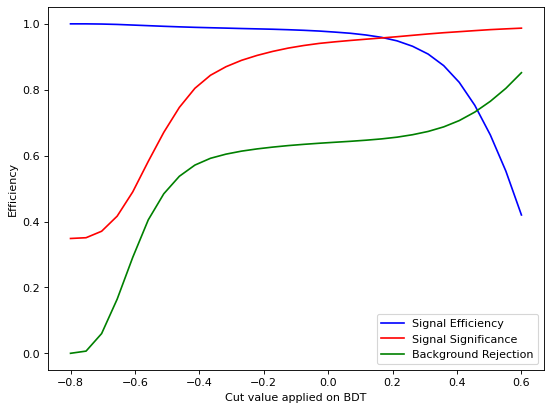

In [316]:
plt.figure(figsize=(8,6), dpi=80)
plt.plot(cuts,efficiency,label='Signal Efficiency',color='blue')
plt.plot(cuts,significance,label='Signal Significance',color='red')
plt.plot(cuts,bckgrej,label='Background Rejection',color='green')
plt.xlabel(r'Cut value applied on BDT')
plt.ylabel(r'Efficiency')
plt.legend()
plt.savefig("images/efficiency")
plt.show()

Lets check the variables

In [70]:
signalcut=sigmc[sigmc['BDTval']>0.5]

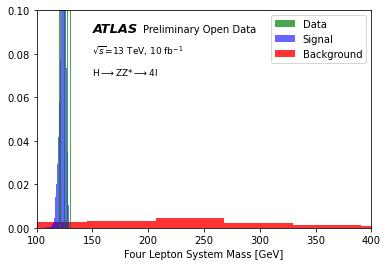

In [73]:
fig,ax = plt.subplots(1)
plt.hist(bckmc['FourLepSystemM'],bins=50,density=1,facecolor='r',alpha=0.8,label='Background')
plt.hist(signalcut['FourLepSystemM'],bins=50,density=1,facecolor='b',alpha=0.6,label='Signal')
plt.hist(signaldata['FourLepSystemM'],bins=100,density=1,facecolor='g',alpha=0.7,label='Data')
#plt.hist(datanocut['FourLepSystemM'],bins=100,density=1,facecolor='cyan',alpha=0.5,label='Data without cuts')
plt.text(150,0.09,'ATLAS', weight='bold',style='italic',fontsize=13 ) 
plt.text(195,0.09, 'Preliminary Open Data', fontsize=10)
plt.text(150,0.08,'$\sqrt{s}$=13 TeV, 10 fb$^{-1}$',fontsize=9 ) 
plt.text(150,0.07,'H$\longrightarrow$ZZ*$\longrightarrow$4l',fontsize=9 ) 
plt.xlim([100,400])
plt.ylim([0,0.1])
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System Mass [GeV]')
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]
labels = [labels[2], labels[1], labels[0]]
ax.legend(handles,labels)
plt.savefig("images/fourmass.png")
plt.show()

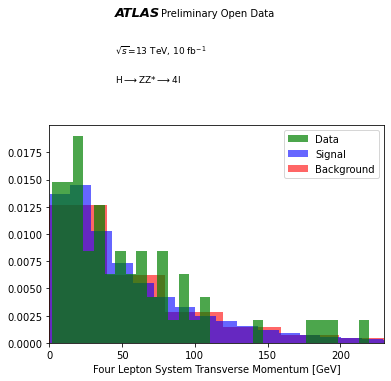

In [43]:
fig,ax = plt.subplots(1)
plt.hist(bckmc['FourLepSystempt'],bins=50,density=1,facecolor='r',alpha=0.6,label='Background')
plt.hist(signalcut['FourLepSystempt'],bins=50,density=1,facecolor='b',alpha=0.6,label='Signal')
plt.hist(signaldata['FourLepSystempt'],bins=30,density=1,facecolor='g',alpha=0.7,label='Data')
plt.text(45,0.030,'ATLAS', weight='bold',style='italic',fontsize=13 ) 
plt.text(77,0.030, 'Preliminary Open Data', fontsize=10)
plt.text(45,0.0265,'$\sqrt{s}$=13 TeV, 10 fb$^{-1}$',fontsize=9 ) 
plt.text(45,0.024,'H$\longrightarrow$ZZ*$\longrightarrow$4l',fontsize=9 ) 
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System Transverse Momentum [GeV]')
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]
labels = [labels[2], labels[1], labels[0]]
ax.legend(handles,labels)
plt.xlim([0,230])
plt.savefig("images/fourpt.png")
plt.show()


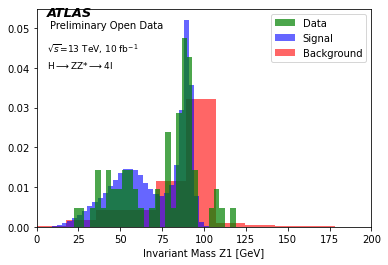

In [44]:
fig,ax = plt.subplots(1)
plt.hist(bckmc['InvMassZ1'],bins=60,density=1,facecolor='r',alpha=0.6,label='Background')
plt.hist(signalcut['InvMassZ1'],bins=50,density=1,facecolor='b',alpha=0.6,label='Signal')
plt.hist(signaldata['InvMassZ1'],bins=30,density=1,facecolor='g',alpha=0.7,label='Data')
plt.text(6,0.053,'ATLAS', weight='bold',style='italic',fontsize=13 ) 
plt.text(8,0.05, 'Preliminary Open Data', fontsize=10)
plt.text(6,0.044,'$\sqrt{s}$=13 TeV, 10 fb$^{-1}$',fontsize=9 ) 
plt.text(6,0.04,'H$\longrightarrow$ZZ*$\longrightarrow$4l',fontsize=9 ) 
plt.legend(loc='upper right')
plt.xlabel(r'Invariant Mass Z1 [GeV]')
plt.xlim([0,200])
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]
labels = [labels[2], labels[1], labels[0]]
ax.legend(handles,labels)
plt.savefig("images/invz1.png")
plt.show()

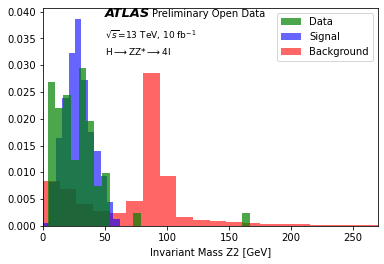

In [45]:
fig,ax = plt.subplots(1)
plt.hist(bckmc['InvMassZ2'],bins=200,density=1,facecolor='r',alpha=0.6,label='Background')
plt.hist(signalcut['InvMassZ2'],bins=50,density=1,facecolor='b',alpha=0.6,label='Signal')
plt.hist(signaldata['InvMassZ2'],bins=100,density=1,facecolor='g',alpha=0.7,label='Data')
plt.text(50,0.039,'ATLAS', weight='bold',style='italic',fontsize=13 ) 
plt.text(88,0.039, 'Preliminary Open Data', fontsize=10)
plt.text(50,0.035,'$\sqrt{s}$=13 TeV, 10 fb$^{-1}$',fontsize=9 ) 
plt.text(50,0.032,'H$\longrightarrow$ZZ*$\longrightarrow$4l',fontsize=9 ) 
plt.legend(loc='upper right')
plt.xlabel(r'Invariant Mass Z2 [GeV]')
plt.xlim([0,270])
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]
labels = [labels[2], labels[1], labels[0]]
ax.legend(handles,labels)
plt.savefig("images/invz2.png")
plt.show()

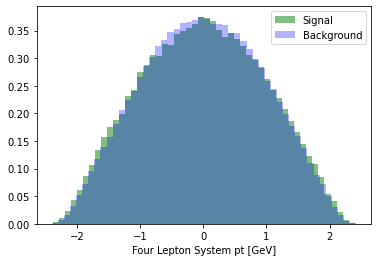

In [69]:
plt.hist(signalcut['FourLepRapidity'],bins=50,density=1,facecolor='g',alpha=0.5,label='Signal')
plt.hist(bckmc['FourLepRapidity'],bins=50,density=1,facecolor='b',alpha=0.3,label='Background')
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System pt [GeV]')
#plt.savefig("figure1.png")
plt.show()

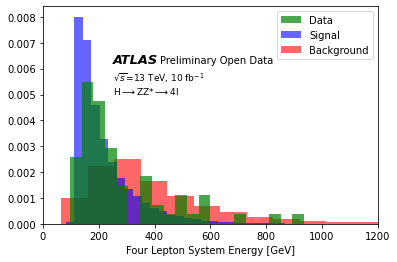

In [46]:
fig,ax = plt.subplots(1)
plt.hist(bckmc['FourLepSystemE'],bins=50,density=1,facecolor='r',alpha=0.6,label='Background')
plt.hist(signalcut['FourLepSystemE'],bins=50,density=1,facecolor='b',alpha=0.6,label='Signal')
plt.hist(signaldata['FourLepSystemE'],bins=20,density=1,facecolor='g',alpha=0.7,label='Data')
plt.text(250,0.0062,'ATLAS', weight='bold',style='italic',fontsize=13 ) 
plt.text(420,0.0062, 'Preliminary Open Data', fontsize=10)
plt.text(250,0.0055,'$\sqrt{s}$=13 TeV, 10 fb$^{-1}$',fontsize=9 ) 
plt.text(250,0.0050,'H$\longrightarrow$ZZ*$\longrightarrow$4l',fontsize=9 ) 
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System Energy [GeV]')
plt.xlim([0,1200])
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[1], handles[0]]
labels = [labels[2], labels[1], labels[0]]
ax.legend(handles,labels)
plt.savefig("images/foure.png")
plt.show()

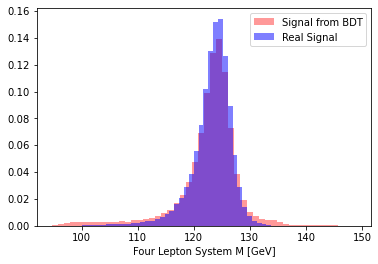

In [13]:
plt.hist(signal['FourLepSystemM'],bins=50,density=1,facecolor='r',alpha=0.4,label='Signal from BDT')
plt.hist(signall['FourLepSystemM'],bins=50,density=1,facecolor='b',alpha=0.5,label='Real Signal')
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System M [GeV]')
plt.savefig("figure3.png")
plt.show()

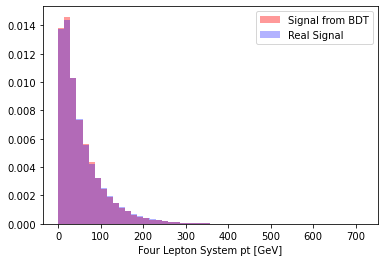

In [14]:
plt.hist(signal['FourLepSystempt'],bins=50,density=1,facecolor='r',alpha=0.4,label='Signal from BDT')
plt.hist(signall['FourLepSystempt'],bins=50,density=1,facecolor='b',alpha=0.3,label='Real Signal')
plt.legend(loc='upper right')
plt.xlabel(r'Four Lepton System pt [GeV]')
plt.savefig("figure4.png")
plt.show()

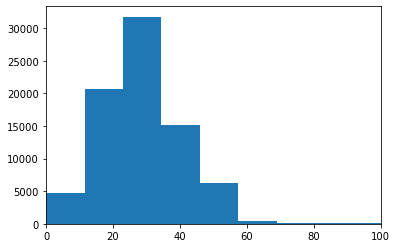

In [89]:
h125=rp.read_root('RootFiles/DataTest.root','Signal')

plt.hist(h125['InvMassZ2'],bins=50)
#plt.hist(bckmc['InvMassZ2'],bins=200)
plt.xlim([0,100])
plt.show()
                  

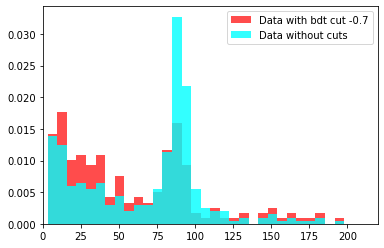

In [86]:
plt.hist(signaldata['InvMassZ2'],bins=100,density=1,facecolor='r',alpha=0.7,label='Data with bdt cut -0.7')
plt.hist(datanocut['InvMassZ2'],bins=100,density=1,facecolor='cyan',alpha=0.8,label='Data without cuts')
plt.xlim([0,220])
plt.legend()
plt.show()

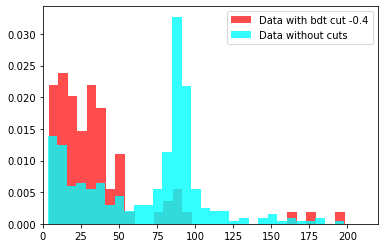

In [88]:
plt.hist(signaldata['InvMassZ2'],bins=100,density=1,facecolor='r',alpha=0.7,label='Data with bdt cut -0.4')
plt.hist(datanocut['InvMassZ2'],bins=100,density=1,facecolor='cyan',alpha=0.8,label='Data without cuts')
plt.xlim([0,220])
plt.legend()
plt.show()